# Plot of posterior samples

_Kara Ponder (SLAC-->?), Emille Ishida (Clermont-Ferrand), Alex Malz (GCCL@RUB)_

plagiarized from `Combination_plots.ipynb`

In [1]:
from collections import OrderedDict
import glob
import gzip
import numpy as np
import os
import pandas as pd
import pickle as pkl
import scipy.stats as sps
from matplotlib.ticker import MaxNLocator
import sys
import pickle

## Kara's plotting code

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
import pylab
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [4]:
all_shapes = {'SLSN': 'o',
              'SNIax': 's',
              'SNII': 'd',
              'SNIbc': 'X',
              'SLSN': 'v',
              'AGN': '^',
              'TDE': '<',
              'KN': '>',
              'CART': 't'}

In [5]:
# Color map
rainbow = cm = plt.get_cmap('plasma_r')
cNorm  = colors.LogNorm(vmin=1, vmax=52) #colors.Normalize(vmin=0, vmax=50)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=rainbow)
color_map = scalarMap.to_rgba(np.arange(1, 52))

## prep for data

In [6]:
# DDF summary on the COIN server:
file_extensions = {'ddf': 'DDF', 
                   'wfd': 'WFD'
                  }
ktot = 1
nobjs = '3000'

In [7]:
def get_cases(field, k='', nobjs=3000):
    if k == '':
        k = '0'
    dirname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/'+field+'/results/v'+k+'/' + str(nobjs) + '/samples/'
    cases = os.listdir(dirname)
    
    if '.ipynb_checkpoints' in cases:
        cases.remove('.ipynb_checkpoints')

    return(cases, dirname)

In [8]:
cases, dirnames = {}, {}
for file_extension in file_extensions:
    cases[file_extension], dirnames[file_extension] = get_cases(file_extensions[file_extension], k=str(ktot))

In [9]:
def make_remap_dict(file_extension):
    if 'wfd' == file_extension:
        remap_dict = OrderedDict({
                              'perfect3000': 'Perfect', 
                              'fiducial3000': 'Fiducial', 
                              'random3000': 'Random',
                              '75SNIa25SNII': 'SN-II 25', 
                              '90SNIa10SNII': 'SN-II 10',
                              '95SNIa5SNII': 'SN-II 5',
                              '98SNIa2SNII': 'SN-II 2',
                              '99SNIa1SNII': 'SN-II 1',
                              '90SNIa10SNIbc': 'SN-Ibc 10',
                              '95SNIa5SNIbc': 'SN-Ibc 5',
                              '98SNIa2SNIbc': 'SN-Ibc 2',
                              '99SNIa1SNIbc': 'SN-Ibc 1',
                              '75SNIa25SNIax': 'SN-Iax 25',
                              '90SNIa10SNIax': 'SN-Iax 10',
                              '95SNIa5SNIax': 'SN-Iax 5',
                              '98SNIa2SNIax': 'SN-Iax 2',
                              '99SNIa1SNIax': 'SN-Iax 1',
                              '98SNIa2CART': 'CART 2',
                              '99SNIa1CART': 'CART 1',
                              '98SNIa2SLSN': 'SLSN 2',
                              '99SNIa1SLSN': 'SLSN 1'
                  })
    else:
        remap_dict = OrderedDict({
                          'perfect3000': 'Perfect', 
                          'fiducial3000': 'Fiducial', 
                          'random3000': 'Random',
                          '72SNIa28SNII': 'SN-II 28',
                          '75SNIa25SNII': 'SN-II 25', 
                          '90SNIa10SNII': 'SN-II 10',
                          '95SNIa5SNII': 'SN-II 5',
                          '98SNIa2SNII': 'SN-II 2',
                          '99SNIa1SNII': 'SN-II 1',
                          '95SNIa5SNIbc': 'SN-Ibc 5',
                          '98SNIa2SNIbc': 'SN-Ibc 2',
                          '99SNIa1SNIbc': 'SN-Ibc 1',
                          '90SNIa10SNIax': 'SN-Iax 10',
                          '95SNIa5SNIax': 'SN-Iax 5',
                          '98SNIa2SNIax': 'SN-Iax 2',
                          '99SNIa1SNIax': 'SN-Iax 1',
              })
    return(remap_dict)

In [10]:
remap_dicts = {}
for file_extension in file_extensions:
    thing = make_remap_dict(file_extension)
    tempdict = {}
    for case in cases[file_extension]:
        if case[:-4] in thing.keys():
            tempdict[case[:-4]] = thing[case[:-4]]
    
    remap_dicts[file_extension] = tempdict

In [11]:
# Mapping the percent contaminated to the colormap.
## size corresponds to remap_dict
def make_color_nums(file_extension):

    if file_extension == 'wfd':
        color_num = np.array([1, 1, 1,                     # Special
                              28, 25, 10, 5, 2, 1,        # II
                              10, 5, 2, 1,                # Ibc
                              25, 10, 5, 2, 1,            # Iax
                              2, 1,                       # CART
                              2, 1                       # SLSN
                          ])                   
    else:
        color_num = np.array([1, 1, 1,                  # Special
                              25, 10, 5, 2, 1,          # II
                              5, 2, 1,                  # Ibc
                              10, 5, 2, 1,              # Iax
                              2,1,                      # SLSN
                              2,1                       # CART
                          ]) 
    return(color_num)

In [12]:
color_nums = {}
for file_extension in file_extensions.keys():
    color_nums[file_extension] = make_color_nums(file_extension)

In [13]:
# Color map
rainbow = cm = plt.get_cmap('plasma_r')
cNorm  = colors.LogNorm(vmin=1, vmax=30) #colors.Normalize(vmin=0, vmax=50)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=rainbow)
color_map = scalarMap.to_rgba(np.arange(1, 30))

## calculate the curve(s)

KDE for each set of posterior samples

In [14]:
eps = 2. * sys.float_info.min

def safe_log(arr, threshold=eps):
    """
    Takes the natural logarithm of an array that might contain zeros.

    Parameters
    ----------
    arr: ndarray, float
        array of values to be logged
    threshold: float, optional
        small, positive value to replace zeros and negative numbers

    Returns
    -------
    logged: ndarray
        logged values, with small value replacing un-loggable values
    """
    arr = np.asarray(arr)
    arr[arr < threshold] = threshold
    logged = np.log(arr)
    return logged

def make_grid(x, y, x_ngrid=100, y_ngrid=100):
    x_min = x.min()#-1.2
    x_max = x.max()#-0.8
    y_min = y.min()#0.2
    y_max = y.max()#0.4

    x_grid, y_grid = np.mgrid[x_min:x_max:x_ngrid*1.j, y_min:y_max:y_ngrid*1.j]
    x_vec, y_vec = x_grid[:, 0], y_grid[0, :]
    dx = (x_max - x_min) / (x_ngrid - 1)
    dy = (y_max - y_min) / (y_ngrid - 1)

    return(((x_min, y_min), (x_max, y_max)), (x_grid, y_grid), (x_vec, y_vec), (dx, dy))

def make_kde(Xgrid, Ygrid, Xsamps, Ysamps, to_log=False, save=None, one_d=True):
    if not one_d:
        positions = np.vstack([Xgrid.ravel(), Ygrid.ravel()])
        values = np.vstack([Xsamps, Ysamps])
        kernel = sps.gaussian_kde(values, bw_method='scott')
        Z = np.reshape(kernel(positions).T, Xgrid.shape)
    else:
        positions = Xgrid.T[0]
        values = Xsamps
        kernel = sps.gaussian_kde(values, bw_method='scott')
        Z = kernel(positions)
    
    if to_log:
        return safe_log(Z)
    else:
        return Z

In [15]:
def get_posteriors(field, k, casename, nsn, withlowz=True):
    
    if 'perfect' in casename or 'random' in casename or 'fiducial' in casename:
        if str(nsn) not in casename:
            case = casename + str(nsn)
        else:
            case = casename
    else:
        case = casename

    filename = 'chains_'+case

    if withlowz:
        filename = filename+'_lowz_withbias'
    path_pre = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/' + file_extensions[field] + \
               '/results/v' + str(k) + '/' + str(nsn) + '/posteriors/pkl/'

    ext = '.pkl'

    samppathname = path_pre+filename+ext

    if ext == '.csv.gz':
        with gzip.open(samppathname) as sampfile:
            sampdata = pd.read_csv(sampfile)
    elif ext == '.pkl':
        with open(samppathname, 'rb') as sampfile:
            sampdata = pkl.load(sampfile)

    return([sampdata['w'], sampdata['om']])

In [16]:
null_cases = ['perfect', 'random', 'fiducial']
kmin = 0
samp_sizes = [1500, 3000, 6000]
ngrid = 100

In [17]:
outdata = {}
for field in file_extensions:
    outdata[field] = {}
    for casename in null_cases:
        outdata[field][casename] = np.empty((ktot, len(samp_sizes), 2, ngrid))
        for k in range(kmin, ktot, 1):
            for i, nsn in enumerate(samp_sizes):
                kpass = k
                [w_comp, Omm_comp] = get_posteriors(field, kpass, casename, nsn, withlowz=True)#[sampdata['w'], sampdata['om']]
                comp_extrema, comp_grids, comp_vecs, comp_ds = make_grid(w_comp, Omm_comp)
                (w_grid, Omm_grid) = comp_grids
                kde_comp = make_kde(w_grid, Omm_grid, w_comp, Omm_comp, one_d=True, to_log=True)
                outdata[field][casename][k][i] = np.array([w_grid.T[0], kde_comp])
with open('default_kdes.pkl', 'wb') as outfile:
    pkl.dump(outdata, outfile)

In [18]:
outdata = {}
for field in file_extensions:
    outdata[field] = {}
    for casename in cases[field]:
        outdata[field][casename[:-4]] = np.empty((2, ngrid))
        k = '0'
        nsn = '3000'
        [w_comp, Omm_comp] = get_posteriors(field, k, casename[:-4], nsn, withlowz=True)
        comp_extrema, comp_grids, comp_vecs, comp_ds = make_grid(w_comp, Omm_comp)
        (w_grid, Omm_grid) = comp_grids
        kde_comp = make_kde(w_grid, Omm_grid, w_comp, Omm_comp, one_d=True, to_log=True)
        outdata[field][casename[:-4]] = np.array([w_grid.T[0], kde_comp])
with open('testcase_kdes.pkl', 'wb') as outfile:
    pkl.dump(outdata, outfile)

## make plot(s)

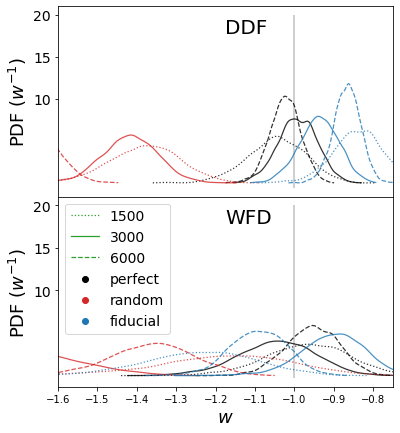

In [19]:
def_colors = {'perfect': 'k', 'random': 'tab:red', 'fiducial': 'tab:blue'}
def_styles = {'1500': ':', '3000': '-', '6000': '--'}


with open('default_kdes.pkl', 'rb') as infile:
    indata = pkl.load(infile)

fig, ax = plt.subplots(2, 1, figsize=(6, 7))    
for j, field in enumerate(file_extensions):
    for casename in null_cases:
        ax[j].scatter([0], [0], label=casename, color=def_colors[casename])
        for i, nsn in enumerate(samp_sizes):
            for k in range(ktot-1, ktot):
                w_grid, kde_comp = indata[field][casename][k][i]
                ax[j].plot(w_grid, np.exp(kde_comp), 
                linestyle=def_styles[str(nsn)], color=def_colors[casename], alpha=0.8, linewidth=1.25)
    for nsn in samp_sizes:
        ax[j].plot([0], [0], label=str(nsn), 
                 linestyle=def_styles[str(nsn)], color='tab:green', alpha=1., linewidth=1.25) 
    ax[j].set_yticks([10, 15, 20])
    ax[j].set_yticklabels([10, 15, 20], fontsize=14)
    ax[j].set_ylabel(r'PDF ($w^{-1}$)', fontsize=18)
    ax[j].vlines(-1., ax[j].get_ylim()[0], ax[j].get_ylim()[1], color='gray', alpha=0.5)

    if j == 0:
        yset = ax[j].get_ylim()[1]
        ax[j].text(-1.175, 0.85*yset, file_extensions[field], fontsize=20)
        ax[j].set_xticks([])

    if j == 1:
        #ax[j].set_xticks([-1.6, -1.4, -1.2, -1.0, -0.8])
        #ax[j].set_xticklabels([-1.6, -1.4, -1.2, -1.0, -0.8], fontsize=14)
        ax[j].legend(loc='upper left', fontsize=14)#, ncol=2)
        ax[j].set_xlabel(r'$w$', fontsize=18)
        yset = ax[j].get_ylim()[1]
        ax[j].text(-1.175, 0.85*yset, file_extensions[field], fontsize=20)
    ax[j].set_xlim(-1.6, -0.75)
fig.subplots_adjust(wspace=0., hspace=0.)

plt.show()

In [20]:
rates, contaminants = {}, {}
for field in file_extensions:
    rate, contaminant = {}, {}
    for key in remap_dicts[field]:
        postsplit = remap_dicts[field][key].split()
        if len(postsplit) > 1:
            name = postsplit[0]
            perc = float(postsplit[-1])

            rate[key] = perc
            contaminant[key] = name
    rates[field] = rate
    contaminants[field] = contaminant

todo: automate dividing into panels

In [21]:
cutoffs = [0., 1., 2., 5., 7.5, 15., 50.]
cutofflabels = ['<1%', '1%', '2%', '5%', '10%', '25%']

panel_groups = {}
for field in file_extensions:
    panel_groups[field] = {j: [] for j in range(6)}

    for i, casefn in enumerate(rates[field]):
        casename = casefn#[:-4]
        rate = rates[field][casename]
        if rate > 0. and rate < 1.:
            panel_groups[field][0].append(casename)
        elif rate >= 1. and rate < 2.:
            panel_groups[field][1].append(casename)
        elif rate >= 2. and rate < 5.:
            panel_groups[field][2].append(casename)
        elif rate >= 5. and rate < 7.5:
            panel_groups[field][3].append(casename)
        elif rate >= 7.5 and rate <= 15.:
            panel_groups[field][4].append(casename)
        elif rate >= 15. and rate <= 50.:
            panel_groups[field][5].append(casename)


In [22]:
ddf_set = set(contaminants['ddf'].values())

wfd_set = set(contaminants['wfd'].values())
all_contaminants = np.unique(np.array(list(ddf_set) + list(wfd_set)))


color_list = OrderedDict({contaminant: plt.cm.tab10(i) for i, contaminant in enumerate(all_contaminants)})

contaminant_colors = {}
for field in file_extensions:
    contaminant_colors[field] = {}
    for i, contaminant in enumerate(contaminants[field]):
        contaminant_colors[field][contaminant] = color_list[contaminants[field][contaminant]]

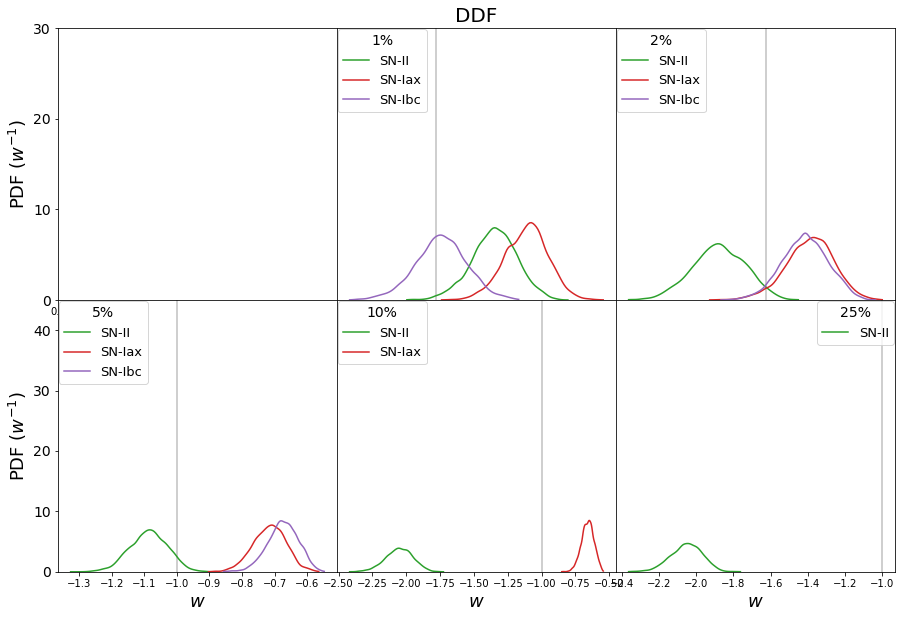

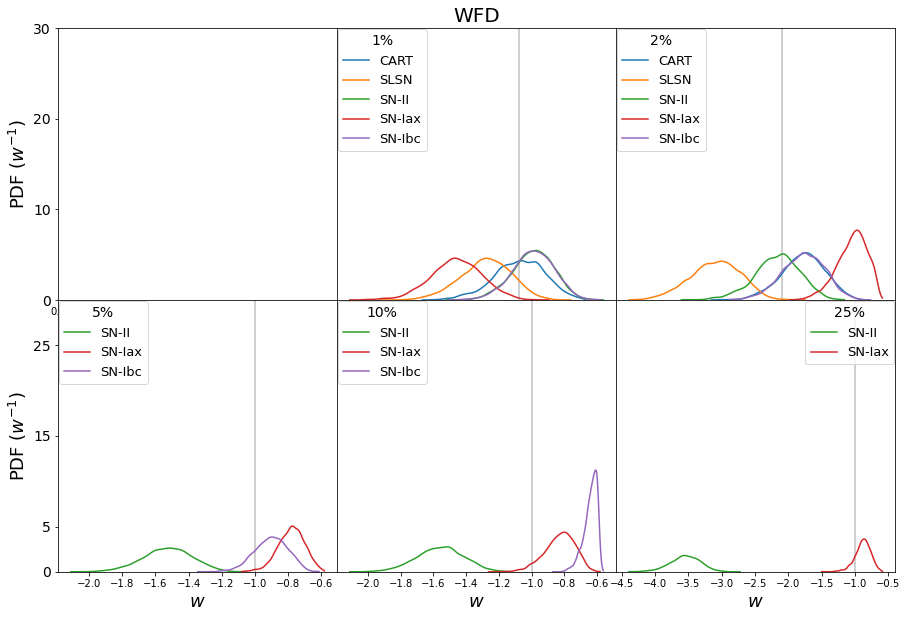

In [23]:
axs = {}

with open('testcase_kdes.pkl', 'rb') as infile:
    indata = pkl.load(infile)

for field in file_extensions:
    table_loc = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/'+file_extensions[field]+'/results/v'+str(3)+'/3000/summary_stats.csv'
    
    df = pd.read_csv(table_loc)
    df = df.set_index('case')

    fig = pylab.figure(figsize=(15, 10))
    bigAxes = pylab.axes(frameon=False)     # hide frame
    bigAxes.set_xticks([])                        # don't want to see any ticks on this axis
    bigAxes.set_yticks([])

    bigAxes.set_title(file_extensions[field], fontsize=20)
    numrows=2
    numcols=3

    for i in range(len(panel_groups[field])):
        per_panel_contaminants = [contaminants[field][panel_groups[field][i][j]] 
                                  for j in range(len(panel_groups[field][i]))]
        uniques, unique_ind = np.unique(per_panel_contaminants, return_index=True)
        
        axs[i] = fig.add_subplot(numrows,numcols,i+1)
        ax = axs[i]

        stylecount = 0
        for j, val in enumerate(unique_ind):
            casename = panel_groups[field][i][val]
            w_grid, kde_comp = indata[field][casename]
            
            if (i > 0):
                ax.plot(w_grid, np.exp(kde_comp), color=contaminant_colors[field][casename], label=per_panel_contaminants[val])
                
            #ax.set_xlim(-1.2, -0.9)
            ax.set_xlabel(r'$w$', fontsize=18)
            #ax.set_xticks([-1.15, -1.1, -1.05, -1.0, -0.95])
            #ax.set_xticklabels([-1.15, -1.1, -1.05,-1.0, -0.95], fontsize=16)
                
                
        if i == 5:    
            l = ax.legend(fontsize=13, loc='upper right', bbox_to_anchor=(1.02, 1.02), title=cutofflabels[i])
        elif i == 0:
            pass
        else:
            l = ax.legend(fontsize=13, loc='upper left', bbox_to_anchor=(-0.02, 1.02), title=cutofflabels[i])
        
        if i > 0:
            plt.setp(l.get_title(),fontsize=14)
        
        if 0 < i < 3 and field == 'ddf':
            axs[i].set_ylim(0., 32.)
        elif i > 2 and field == 'ddf':
            axs[i].set_ylim(0, 45)
        
        if 0 < i < 3 and field == 'wfd':
            axs[i].set_ylim(0., 25.)
        elif i > 2 and field == 'wfd':
            axs[i].set_ylim(0, 30)
           
        if i%3 == 0:
            ax.set_ylabel(r'PDF ($w^{-1}$)', fontsize=18)
        elif i in [1,2]:
            ax.set_ylim(axs[1].get_ylim())
        elif i in [4,5]:
            ax.set_ylim(axs[3].get_ylim())
        
    for ii in [1,2,4,5]:
        axs[ii].set_yticks([])
        
    axs[0].set_yticks([0, 10, 20, 30])
    axs[0].set_yticklabels([0, 10, 20, 30], fontsize=14)

    if field == 'ddf':    
        axs[3].set_yticks([0, 10, 20, 30,40])
        axs[3].set_yticklabels([0, 10, 20, 30,40], fontsize=14)
    else:    
        axs[3].set_yticks([0, 5, 15, 25])
        axs[3].set_yticklabels([0, 5, 15, 25], fontsize=14)
        
    for i in range(6):
        if i == 0:
            pass
        else:
            axs[i].vlines(-1., axs[i].get_ylim()[0], axs[i].get_ylim()[1], color='gray', alpha=0.5)
    
    
    fig.subplots_adjust(wspace=0., hspace=0.)

    fig.show()

In [24]:
a_file = open("colors.pkl", "wb")

pickle.dump(contaminant_colors, a_file)

a_file.close()

In [25]:
from scipy.stats import kde
from copy import deepcopy
import seaborn as sns

data_all = []
x = np.linspace(-2,0,1000)
k = [6, 6, 6]

group1 = ['99SNIa1SNII', '99SNIa1SNIax', '99SNIa1SNIbc']
group2 = ['98SNIa2SNII', '98SNIa2SNIax', '98SNIa2SNIbc']
group3 = ['95SNIa5SNII', '95SNIa5SNIax', '95SNIa5SNIbc']

for case in group1:

    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/DDF/results/v' + str(k[0]) + '/' + \
            '3000/posteriors/csv/chains_' + case + '_lowz_withbias.csv.gz'

    data = pd.read_csv(fname, index_col=False)
    data['case'] = case
    data_all.append(data)
    
for case in group2:

    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/DDF/results/v' + str(k[1]) + '/' + \
            '3000/posteriors/csv/chains_' + case + '_lowz_withbias.csv.gz'

    data = pd.read_csv(fname, index_col=False)
    data['case'] = case
    data_all.append(data)

for case in group3:

    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/DDF/results/v' + str(k[2]) + '/' + \
            '3000/posteriors/csv/chains_' + case + '_lowz_withbias.csv.gz'

    data = pd.read_csv(fname, index_col=False)
    data['case'] = case
    data_all.append(data)

    
data_all2 = pd.concat(data_all, ignore_index=True)

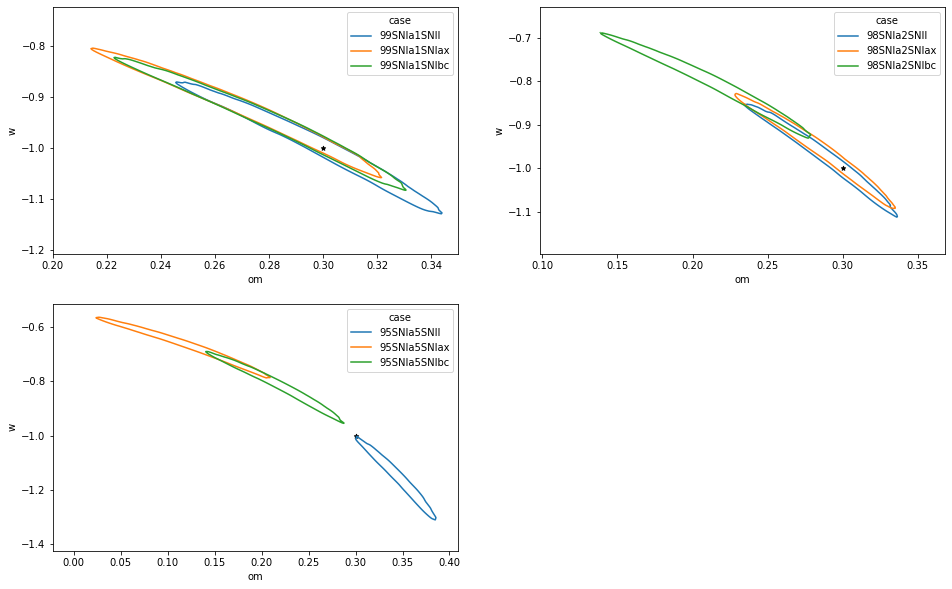

In [26]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
flag = np.array([data_all2['case'].values[i] in group1 for i in range(data_all2.shape[0])])
sns.kdeplot(
    data=data_all2[flag], x="om", y="w", hue='case', levels=1
)
plt.scatter([0.3], [-1], marker='*', s=20, color='black')
plt.xlim(0.2, 0.35)

plt.subplot(2,2,2)
flag = np.array([data_all2['case'].values[i] in group2 for i in range(data_all2.shape[0])])
sns.kdeplot(
    data=data_all2[flag], x="om", y="w", hue='case', levels=1
)
plt.scatter([0.3], [-1], marker='*', s=20, color='black')

plt.subplot(2,2,3)
flag = np.array([data_all2['case'].values[i] in group3 for i in range(data_all2.shape[0])])
sns.kdeplot(
    data=data_all2[flag], x="om", y="w", hue='case', levels=1
)
plt.scatter([0.3], [-1], marker='*', s=20, color='black')

plt.show()